### Import independencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import image
import matplotlib.pyplot as plt
from numpy.random import random, seed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from sklearn import preprocessing
import keras
from keras.models import Sequential
from keras.layers import Dense
pd.options.mode.chained_assignment = None  # default='warn'

# Part I: Data overview


In [2]:
# Loading our dataset 
data = pd.read_csv('weatherAUS.csv')
print(data.info())
print("----------------------------")
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [3]:
# Loading our dataset 
data = pd.read_csv('weatherAUS.csv')
data["Date"] = pd.to_datetime(data["Date"])       # Change to datetime type so we can then divide into year , month and day
data["Year"] = data["Date"].dt.year
data["Month"] = data["Date"].dt.month
data["Day"] = data["Date"].dt.day
data.drop("Date",axis=1,inplace=True)
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [4]:
data.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Year                 0
Month                0
Day                  0
dtype: int64

# Part II: Data preprocessing:

## A. Categorical features:  Replace missing values by common and encoding

In [5]:
# categorical feature
cat_feature = [i for i in data.columns if data[i].dtype=='O']
data[cat_feature].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


In [6]:
for col in cat_feature:
    if data[col].isnull().sum() !=0 : 
        common = data[col].mode()[0]         # returns the most frequent value 
        data[col] = data[col].fillna(common)
        

## B: Model
Two models are used, Convolutional and Fully_dense => Try to play with design of layers

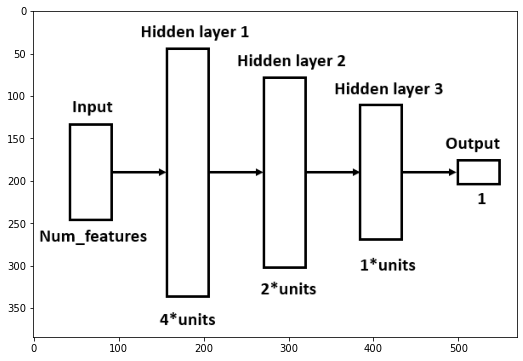

In [7]:
array  = image.imread('model.png')
plt.figure(figsize = (20,6))
plt.imshow(array)

In [21]:
from tensorflow.keras.layers import Dense , Dropout, Conv1D, Reshape, BatchNormalization as BN
import tensorflow as tf

def train_model(model, name, train_data, val_data, batch_size=100, epochs=30):
    def lr_scheduler(epochs):
        if epochs < 10:
            return 1e-3
        else:
            if epochs < 20:
                return 1e-4
            else:
                return 1e-5

    filepath =  './models/' + name + '.hdf5'
    saving = tf.keras.callbacks.ModelCheckpoint(filepath=filepath,
                                                monitor='val_accuracy',
                                                save_best_only=True,
                                                 save_weights_only=True)
    history = model.fit(
    train_data[0], train_data[1],
    epochs=epochs,
    batch_size=batch_size,
    validation_data=val_data,
    verbose=2,
    callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_scheduler), saving]
    )   

    return None


def fully_dense_model(num_features, train_data, val_data, 
                      units, activation, rate=0):
    inputs = tf.keras.layers.Input(shape=(num_features,))
    x = Dense(4*units, activation=activation)(inputs)
    x = BN()(x)
    x = Dropout(rate)(x)
    x = Dense(2*units, activation=activation)(x)
    x = BN()(x)
    x = Dropout(rate)(x)
    x = Dense(units, activation=activation)(x)
    x = BN()(x)
    x = Dropout(rate)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    
    name = 'fully_dense_num-features=' + str(num_features)
    file_path = './models/' + name + '.hdf5'
    train_model(model, name, train_data, val_data)
    model.load_weights(file_path)
    
    return model






## C: Encoding

In [9]:
df = data.copy()

In [10]:
#encoding categorical variables to numeric ones
from sklearn.preprocessing import LabelEncoder
for col in cat_feature:
    lbl = LabelEncoder()
    lbl.fit(list(df[col].values))
    df[col] = lbl.transform(df[col].values)

In [11]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,...,1007.1,8.0,NaN,16.9,21.8,0,0,2008,12,1
1,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,...,1007.8,NaN,NaN,17.2,24.3,0,0,2008,12,2
2,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,...,1008.7,NaN,2.0,21.0,23.2,0,0,2008,12,3
3,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,...,1012.8,NaN,NaN,18.1,26.5,0,0,2008,12,4
4,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5


In [12]:
#Excluding the outliers

features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for feature in features_with_outliers:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

## D: Handle NaN values: replaced by mean values 
This part should be seperated between train and test set

In [13]:
from sklearn.impute import SimpleImputer
nan_col = [i for i in df.columns if df[i].isnull().sum() != 0 ]

In [14]:
def handle_nan(X_train, X_test, method = 'median'):
    global nan_col,df
    imputer = SimpleImputer(missing_values=np.nan, strategy= method)
    for col in  nan_col:
        X_train[[col]] = imputer.fit_transform(X_train[[col]])
        X_test[[col]] = imputer.fit_transform(X_test[[col]])
    return X_train,X_test

## Part III: Testing

Split and standardize data

## Part IV: Choosing the best model

### Median + interger encoding

In [15]:
best_function= None
best_unit = None
best = 0
units = [64,128]
functions = ['relu', 'tanh', 'sigmoid']
f= open("median_interger.txt","w+")
for unit in units:
    for func in functions:
        f.write(' unit, activation function, features , train accuracy, test accuracy \n' )
        
        df_train, df_test = train_test_split(df,test_size=0.2, random_state=0)
        X_train = df_train.drop(["RainTomorrow"], axis=1)
        y_train = df_train.RainTomorrow
        X_test = df_test.drop(["RainTomorrow"], axis=1)
        y_test = df_test.RainTomorrow

        X_train,X_test = handle_nan(X_train, X_test)

        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train= scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        num_features = X_train.shape[1]

        model = fully_dense_model(num_features, (X_train,y_train), (X_test, y_test), units = unit,activation = func )
        loss, test_accuracy = model.evaluate(X_test,y_test)
        _, train_accuracy = model.evaluate(X_train, y_train)
        string = str(unit) + ' ' + func+ ' ' +str(num_features)+' '+str(train_accuracy)+ ' '+str(test_accuracy)+'\n'
        f.write(string)

        if best < test_accuracy:
            best = test_accuracy
            best_unit = unit
            best_function = func
f.close()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 24)]              0         
                                                                 
 dense (Dense)               (None, 256)               6400      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                             

Epoch 1/30
1164/1164 - 4s - loss: 0.3881 - accuracy: 0.8309 - val_loss: 0.3574 - val_accuracy: 0.8452 - lr: 0.0010 - 4s/epoch - 4ms/step
Epoch 2/30
1164/1164 - 4s - loss: 0.3592 - accuracy: 0.8452 - val_loss: 0.3523 - val_accuracy: 0.8487 - lr: 0.0010 - 4s/epoch - 3ms/step
Epoch 3/30
1164/1164 - 4s - loss: 0.3526 - accuracy: 0.8478 - val_loss: 0.3511 - val_accuracy: 0.8504 - lr: 0.0010 - 4s/epoch - 3ms/step
Epoch 4/30
1164/1164 - 4s - loss: 0.3484 - accuracy: 0.8499 - val_loss: 0.3513 - val_accuracy: 0.8487 - lr: 0.0010 - 4s/epoch - 3ms/step
Epoch 5/30
1164/1164 - 4s - loss: 0.3459 - accuracy: 0.8504 - val_loss: 0.3474 - val_accuracy: 0.8511 - lr: 0.0010 - 4s/epoch - 3ms/step
Epoch 6/30
1164/1164 - 4s - loss: 0.3437 - accuracy: 0.8518 - val_loss: 0.3462 - val_accuracy: 0.8494 - lr: 0.0010 - 4s/epoch - 3ms/step
Epoch 7/30
1164/1164 - 4s - loss: 0.3424 - accuracy: 0.8516 - val_loss: 0.3460 - val_accuracy: 0.8515 - lr: 0.0010 - 4s/epoch - 3ms/step
Epoch 8/30
1164/1164 - 4s - loss: 0.3392 

Epoch 14/30
1164/1164 - 4s - loss: 0.3249 - accuracy: 0.8597 - val_loss: 0.3357 - val_accuracy: 0.8558 - lr: 1.0000e-04 - 4s/epoch - 3ms/step
Epoch 15/30
1164/1164 - 4s - loss: 0.3242 - accuracy: 0.8597 - val_loss: 0.3356 - val_accuracy: 0.8547 - lr: 1.0000e-04 - 4s/epoch - 3ms/step
Epoch 16/30
1164/1164 - 4s - loss: 0.3235 - accuracy: 0.8597 - val_loss: 0.3356 - val_accuracy: 0.8558 - lr: 1.0000e-04 - 4s/epoch - 3ms/step
Epoch 17/30
1164/1164 - 4s - loss: 0.3235 - accuracy: 0.8603 - val_loss: 0.3357 - val_accuracy: 0.8562 - lr: 1.0000e-04 - 4s/epoch - 4ms/step
Epoch 18/30
1164/1164 - 5s - loss: 0.3227 - accuracy: 0.8609 - val_loss: 0.3358 - val_accuracy: 0.8557 - lr: 1.0000e-04 - 5s/epoch - 4ms/step
Epoch 19/30
1164/1164 - 4s - loss: 0.3225 - accuracy: 0.8602 - val_loss: 0.3352 - val_accuracy: 0.8557 - lr: 1.0000e-04 - 4s/epoch - 3ms/step
Epoch 20/30
1164/1164 - 4s - loss: 0.3224 - accuracy: 0.8612 - val_loss: 0.3357 - val_accuracy: 0.8548 - lr: 1.0000e-04 - 4s/epoch - 3ms/step
Epoch 

Epoch 27/30
1164/1164 - 5s - loss: 0.2766 - accuracy: 0.8809 - val_loss: 0.3424 - val_accuracy: 0.8553 - lr: 1.0000e-05 - 5s/epoch - 4ms/step
Epoch 28/30
1164/1164 - 5s - loss: 0.2763 - accuracy: 0.8801 - val_loss: 0.3431 - val_accuracy: 0.8553 - lr: 1.0000e-05 - 5s/epoch - 4ms/step
Epoch 29/30
1164/1164 - 5s - loss: 0.2768 - accuracy: 0.8807 - val_loss: 0.3434 - val_accuracy: 0.8555 - lr: 1.0000e-05 - 5s/epoch - 4ms/step
Epoch 30/30
1164/1164 - 5s - loss: 0.2766 - accuracy: 0.8798 - val_loss: 0.3433 - val_accuracy: 0.8551 - lr: 1.0000e-05 - 5s/epoch - 4ms/step
3637/3637 [==============================] - ETA: 0s - loss: 0.2914 - accuracy: 0.87 - 5s 1ms/step - loss: 0.2910 - accuracy: 0.8746
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 24)]              0         
                                                                 
 dense_16 (Dense) 

Epoch 1/30
1164/1164 - 6s - loss: 0.3839 - accuracy: 0.8316 - val_loss: 0.3565 - val_accuracy: 0.8468 - lr: 0.0010 - 6s/epoch - 5ms/step
Epoch 2/30
1164/1164 - 5s - loss: 0.3564 - accuracy: 0.8461 - val_loss: 0.3515 - val_accuracy: 0.8478 - lr: 0.0010 - 5s/epoch - 4ms/step
Epoch 3/30
1164/1164 - 5s - loss: 0.3506 - accuracy: 0.8481 - val_loss: 0.3473 - val_accuracy: 0.8496 - lr: 0.0010 - 5s/epoch - 5ms/step
Epoch 4/30
1164/1164 - 5s - loss: 0.3461 - accuracy: 0.8508 - val_loss: 0.3444 - val_accuracy: 0.8520 - lr: 0.0010 - 5s/epoch - 4ms/step
Epoch 5/30
1164/1164 - 5s - loss: 0.3423 - accuracy: 0.8519 - val_loss: 0.3434 - val_accuracy: 0.8529 - lr: 0.0010 - 5s/epoch - 5ms/step
Epoch 6/30
1164/1164 - 5s - loss: 0.3399 - accuracy: 0.8532 - val_loss: 0.3420 - val_accuracy: 0.8524 - lr: 0.0010 - 5s/epoch - 4ms/step
Epoch 7/30
1164/1164 - 5s - loss: 0.3379 - accuracy: 0.8536 - val_loss: 0.3405 - val_accuracy: 0.8548 - lr: 0.0010 - 5s/epoch - 5ms/step
Epoch 8/30
1164/1164 - 5s - loss: 0.3355 

In [16]:
print('best accuracy: ', best, 'best unit', best_unit, 'best function', best_function)

best accuracy:  0.8575897216796875 best unit 128 best function relu


### 2nd: One - hot encoding

In [22]:
df1 = data.copy()
lbl = LabelEncoder()
lbl.fit(list(df1["RainTomorrow"].values))
df1["RainTomorrow"] = lbl.transform(df1["RainTomorrow"].values)

for col in cat_feature[:-1]:
    buffer = pd.get_dummies(df1[col])
    df1 = pd.concat([df1,buffer], axis = 1)
    df1 = df1.drop(columns = col)

In [23]:
#Excluding the outliers

features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for feature in features_with_outliers:
    q1 = df1[feature].quantile(0.25)
    q3 = df1[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df1.loc[df[feature]<lower_limit,feature] = lower_limit
    df1.loc[df[feature]>upper_limit,feature] = upper_limit

In [19]:
best_function= None
best_unit = None
best = 0
units = [64,128, 256,512]
functions = ['relu', 'tanh', 'sigmoid']
f= open("median_onehot.txt","w+")
for unit in units:
    for func in functions:
        f.write(' unit, activation function, features , train accuracy, test accuracy \n' )
        df_train, df_test = train_test_split(df1,test_size=0.2, random_state=0)
        X_train = df_train.drop(["RainTomorrow"], axis=1)
        y_train = df_train.RainTomorrow
        X_test = df_test.drop(["RainTomorrow"], axis=1)
        y_test = df_test.RainTomorrow

        X_train,X_test = handle_nan(X_train, X_test)

        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train= scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        num_features = X_train.shape[1]

        model = fully_dense_model(num_features, (X_train,y_train), (X_test, y_test), units = unit,activation = func )
        loss, test_accuracy = model.evaluate(X_test,y_test)
        _, train_accuracy = model.evaluate(X_train, y_train)
        string = str(unit) + ' ' + func+ ' ' +str(num_features)+' '+str(train_accuracy)+ ' '+str(test_accuracy)+'\n'
        f.write(string)
        
        if best < test_accuracy:
            best = test_accuracy
            best_unit = unit
            best_function = func
f.close()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 118)]             0         
                                                                 
 dense_24 (Dense)            (None, 256)               30464     
                                                                 
 batch_normalization_18 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dropout_18 (Dropout)        (None, 256)               0         
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_19 (Bat  (None, 128)              512       
 chNormalization)                                          

Epoch 1/30
1164/1164 - 5s - loss: 0.3844 - accuracy: 0.8312 - val_loss: 0.3471 - val_accuracy: 0.8499 - lr: 0.0010 - 5s/epoch - 4ms/step
Epoch 2/30
1164/1164 - 5s - loss: 0.3409 - accuracy: 0.8540 - val_loss: 0.3402 - val_accuracy: 0.8535 - lr: 0.0010 - 5s/epoch - 4ms/step
Epoch 3/30
1164/1164 - 4s - loss: 0.3316 - accuracy: 0.8580 - val_loss: 0.3340 - val_accuracy: 0.8580 - lr: 0.0010 - 4s/epoch - 4ms/step
Epoch 4/30
1164/1164 - 4s - loss: 0.3240 - accuracy: 0.8605 - val_loss: 0.3313 - val_accuracy: 0.8566 - lr: 0.0010 - 4s/epoch - 3ms/step
Epoch 5/30
1164/1164 - 4s - loss: 0.3177 - accuracy: 0.8639 - val_loss: 0.3339 - val_accuracy: 0.8558 - lr: 0.0010 - 4s/epoch - 4ms/step
Epoch 6/30
1164/1164 - 4s - loss: 0.3120 - accuracy: 0.8663 - val_loss: 0.3337 - val_accuracy: 0.8561 - lr: 0.0010 - 4s/epoch - 3ms/step
Epoch 7/30
1164/1164 - 4s - loss: 0.3069 - accuracy: 0.8688 - val_loss: 0.3314 - val_accuracy: 0.8565 - lr: 0.0010 - 4s/epoch - 4ms/step
Epoch 8/30
1164/1164 - 4s - loss: 0.3001 

Epoch 14/30
1164/1164 - 4s - loss: 0.2811 - accuracy: 0.8797 - val_loss: 0.3231 - val_accuracy: 0.8636 - lr: 1.0000e-04 - 4s/epoch - 4ms/step
Epoch 15/30
1164/1164 - 5s - loss: 0.2803 - accuracy: 0.8797 - val_loss: 0.3237 - val_accuracy: 0.8637 - lr: 1.0000e-04 - 5s/epoch - 4ms/step
Epoch 16/30
1164/1164 - 4s - loss: 0.2784 - accuracy: 0.8812 - val_loss: 0.3248 - val_accuracy: 0.8629 - lr: 1.0000e-04 - 4s/epoch - 4ms/step
Epoch 17/30
1164/1164 - 4s - loss: 0.2773 - accuracy: 0.8814 - val_loss: 0.3255 - val_accuracy: 0.8635 - lr: 1.0000e-04 - 4s/epoch - 3ms/step
Epoch 18/30
1164/1164 - 4s - loss: 0.2755 - accuracy: 0.8824 - val_loss: 0.3271 - val_accuracy: 0.8619 - lr: 1.0000e-04 - 4s/epoch - 3ms/step
Epoch 19/30
1164/1164 - 4s - loss: 0.2753 - accuracy: 0.8819 - val_loss: 0.3272 - val_accuracy: 0.8626 - lr: 1.0000e-04 - 4s/epoch - 3ms/step
Epoch 20/30
1164/1164 - 4s - loss: 0.2752 - accuracy: 0.8825 - val_loss: 0.3276 - val_accuracy: 0.8626 - lr: 1.0000e-04 - 4s/epoch - 3ms/step
Epoch 

Epoch 27/30
1164/1164 - 6s - loss: 0.1557 - accuracy: 0.9353 - val_loss: 0.4512 - val_accuracy: 0.8467 - lr: 1.0000e-05 - 6s/epoch - 5ms/step
Epoch 28/30
1164/1164 - 6s - loss: 0.1544 - accuracy: 0.9356 - val_loss: 0.4529 - val_accuracy: 0.8469 - lr: 1.0000e-05 - 6s/epoch - 5ms/step
Epoch 29/30
1164/1164 - 6s - loss: 0.1541 - accuracy: 0.9355 - val_loss: 0.4541 - val_accuracy: 0.8468 - lr: 1.0000e-05 - 6s/epoch - 5ms/step
Epoch 30/30
1164/1164 - 6s - loss: 0.1549 - accuracy: 0.9353 - val_loss: 0.4544 - val_accuracy: 0.8468 - lr: 1.0000e-05 - 6s/epoch - 5ms/step
3637/3637 [==============================] - 5s 1ms/step - loss: 0.2498 - accuracy: 0.8927: 0s - loss: 0.249
Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 118)]             0         
                                                                 
 dense_40 (Dense)            (None, 512) 

Epoch 1/30
1164/1164 - 7s - loss: 0.3764 - accuracy: 0.8351 - val_loss: 0.3442 - val_accuracy: 0.8519 - lr: 0.0010 - 7s/epoch - 6ms/step
Epoch 2/30
1164/1164 - 6s - loss: 0.3433 - accuracy: 0.8532 - val_loss: 0.3372 - val_accuracy: 0.8549 - lr: 0.0010 - 6s/epoch - 5ms/step
Epoch 3/30
1164/1164 - 6s - loss: 0.3330 - accuracy: 0.8566 - val_loss: 0.3317 - val_accuracy: 0.8573 - lr: 0.0010 - 6s/epoch - 5ms/step
Epoch 4/30
1164/1164 - 6s - loss: 0.3283 - accuracy: 0.8584 - val_loss: 0.3334 - val_accuracy: 0.8571 - lr: 0.0010 - 6s/epoch - 5ms/step
Epoch 5/30
1164/1164 - 6s - loss: 0.3224 - accuracy: 0.8611 - val_loss: 0.3295 - val_accuracy: 0.8593 - lr: 0.0010 - 6s/epoch - 5ms/step
Epoch 6/30
1164/1164 - 6s - loss: 0.3176 - accuracy: 0.8631 - val_loss: 0.3265 - val_accuracy: 0.8614 - lr: 0.0010 - 6s/epoch - 5ms/step
Epoch 7/30
1164/1164 - 6s - loss: 0.3124 - accuracy: 0.8651 - val_loss: 0.3294 - val_accuracy: 0.8597 - lr: 0.0010 - 6s/epoch - 5ms/step
Epoch 8/30
1164/1164 - 6s - loss: 0.3069 

Epoch 14/30
1164/1164 - 11s - loss: 0.1608 - accuracy: 0.9334 - val_loss: 0.4451 - val_accuracy: 0.8491 - lr: 1.0000e-04 - 11s/epoch - 10ms/step
Epoch 15/30
1164/1164 - 11s - loss: 0.1518 - accuracy: 0.9367 - val_loss: 0.4674 - val_accuracy: 0.8472 - lr: 1.0000e-04 - 11s/epoch - 10ms/step
Epoch 16/30
1164/1164 - 11s - loss: 0.1435 - accuracy: 0.9403 - val_loss: 0.4898 - val_accuracy: 0.8456 - lr: 1.0000e-04 - 11s/epoch - 10ms/step
Epoch 17/30
1164/1164 - 11s - loss: 0.1364 - accuracy: 0.9433 - val_loss: 0.5056 - val_accuracy: 0.8461 - lr: 1.0000e-04 - 11s/epoch - 10ms/step
Epoch 18/30
1164/1164 - 11s - loss: 0.1290 - accuracy: 0.9467 - val_loss: 0.5226 - val_accuracy: 0.8445 - lr: 1.0000e-04 - 11s/epoch - 10ms/step
Epoch 19/30
1164/1164 - 11s - loss: 0.1248 - accuracy: 0.9485 - val_loss: 0.5426 - val_accuracy: 0.8435 - lr: 1.0000e-04 - 11s/epoch - 10ms/step
Epoch 20/30
1164/1164 - 11s - loss: 0.1183 - accuracy: 0.9513 - val_loss: 0.5631 - val_accuracy: 0.8435 - lr: 1.0000e-04 - 11s/epo

Epoch 26/30
1164/1164 - 12s - loss: 0.1992 - accuracy: 0.9177 - val_loss: 0.3725 - val_accuracy: 0.8543 - lr: 1.0000e-05 - 12s/epoch - 10ms/step
Epoch 27/30
1164/1164 - 12s - loss: 0.1996 - accuracy: 0.9173 - val_loss: 0.3732 - val_accuracy: 0.8539 - lr: 1.0000e-05 - 12s/epoch - 10ms/step
Epoch 28/30
1164/1164 - 12s - loss: 0.1999 - accuracy: 0.9165 - val_loss: 0.3742 - val_accuracy: 0.8538 - lr: 1.0000e-05 - 12s/epoch - 11ms/step
Epoch 29/30
1164/1164 - 11s - loss: 0.1982 - accuracy: 0.9183 - val_loss: 0.3747 - val_accuracy: 0.8538 - lr: 1.0000e-05 - 11s/epoch - 10ms/step
Epoch 30/30
1164/1164 - 11s - loss: 0.1971 - accuracy: 0.9188 - val_loss: 0.3756 - val_accuracy: 0.8534 - lr: 1.0000e-05 - 11s/epoch - 10ms/step
3637/3637 [==============================] - 7s 2ms/step - loss: 0.2397 - accuracy: 0.8986
Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(Non

Epoch 1/30
1164/1164 - 29s - loss: 0.3796 - accuracy: 0.8384 - val_loss: 0.3412 - val_accuracy: 0.8511 - lr: 0.0010 - 29s/epoch - 25ms/step
Epoch 2/30
1164/1164 - 28s - loss: 0.3327 - accuracy: 0.8570 - val_loss: 0.3286 - val_accuracy: 0.8585 - lr: 0.0010 - 28s/epoch - 24ms/step
Epoch 3/30
1164/1164 - 28s - loss: 0.3241 - accuracy: 0.8608 - val_loss: 0.3276 - val_accuracy: 0.8594 - lr: 0.0010 - 28s/epoch - 24ms/step
Epoch 4/30
1164/1164 - 28s - loss: 0.3176 - accuracy: 0.8623 - val_loss: 0.3353 - val_accuracy: 0.8524 - lr: 0.0010 - 28s/epoch - 24ms/step
Epoch 5/30
1164/1164 - 28s - loss: 0.3104 - accuracy: 0.8659 - val_loss: 0.3351 - val_accuracy: 0.8541 - lr: 0.0010 - 28s/epoch - 24ms/step
Epoch 6/30
1164/1164 - 28s - loss: 0.3027 - accuracy: 0.8688 - val_loss: 0.3275 - val_accuracy: 0.8610 - lr: 0.0010 - 28s/epoch - 24ms/step
Epoch 7/30
1164/1164 - 28s - loss: 0.2941 - accuracy: 0.8728 - val_loss: 0.3266 - val_accuracy: 0.8614 - lr: 0.0010 - 28s/epoch - 24ms/step
Epoch 8/30
1164/1164

Epoch 13/30
1164/1164 - 28s - loss: 0.2832 - accuracy: 0.8773 - val_loss: 0.3257 - val_accuracy: 0.8620 - lr: 1.0000e-04 - 28s/epoch - 24ms/step
Epoch 14/30
1164/1164 - 28s - loss: 0.2777 - accuracy: 0.8802 - val_loss: 0.3271 - val_accuracy: 0.8618 - lr: 1.0000e-04 - 28s/epoch - 24ms/step
Epoch 15/30
1164/1164 - 28s - loss: 0.2721 - accuracy: 0.8828 - val_loss: 0.3287 - val_accuracy: 0.8621 - lr: 1.0000e-04 - 28s/epoch - 24ms/step
Epoch 16/30
1164/1164 - 28s - loss: 0.2679 - accuracy: 0.8844 - val_loss: 0.3319 - val_accuracy: 0.8596 - lr: 1.0000e-04 - 28s/epoch - 24ms/step
Epoch 17/30
1164/1164 - 28s - loss: 0.2615 - accuracy: 0.8881 - val_loss: 0.3345 - val_accuracy: 0.8595 - lr: 1.0000e-04 - 28s/epoch - 24ms/step
Epoch 18/30
1164/1164 - 28s - loss: 0.2567 - accuracy: 0.8897 - val_loss: 0.3352 - val_accuracy: 0.8594 - lr: 1.0000e-04 - 28s/epoch - 24ms/step
Epoch 19/30
1164/1164 - 28s - loss: 0.2511 - accuracy: 0.8931 - val_loss: 0.3386 - val_accuracy: 0.8588 - lr: 1.0000e-04 - 28s/epo

Epoch 25/30
1164/1164 - 29s - loss: 0.2329 - accuracy: 0.9009 - val_loss: 0.3463 - val_accuracy: 0.8557 - lr: 1.0000e-05 - 29s/epoch - 25ms/step
Epoch 26/30
1164/1164 - 30s - loss: 0.2307 - accuracy: 0.9014 - val_loss: 0.3467 - val_accuracy: 0.8560 - lr: 1.0000e-05 - 30s/epoch - 25ms/step
Epoch 27/30
1164/1164 - 29s - loss: 0.2309 - accuracy: 0.9020 - val_loss: 0.3477 - val_accuracy: 0.8557 - lr: 1.0000e-05 - 29s/epoch - 25ms/step
Epoch 28/30
1164/1164 - 29s - loss: 0.2293 - accuracy: 0.9022 - val_loss: 0.3480 - val_accuracy: 0.8555 - lr: 1.0000e-05 - 29s/epoch - 25ms/step
Epoch 29/30
1164/1164 - 29s - loss: 0.2288 - accuracy: 0.9024 - val_loss: 0.3487 - val_accuracy: 0.8553 - lr: 1.0000e-05 - 29s/epoch - 25ms/step
Epoch 30/30
1164/1164 - 29s - loss: 0.2268 - accuracy: 0.9044 - val_loss: 0.3497 - val_accuracy: 0.8553 - lr: 1.0000e-05 - 29s/epoch - 25ms/step
3637/3637 [==============================] - 14s 4ms/step - loss: 0.2612 - accuracy: 0.8882


In [20]:
print('best accuracy: ', best, 'best unit', best_unit, 'best function', best_function)

best accuracy:  0.8638800978660583 best unit 64 best function sigmoid


In [24]:
best_function= None
best_unit = None
best = 0
units = [64,128]
functions = ['relu', 'tanh', 'sigmoid']
f= open("median_onehot_0.txt","w+")
for unit in units:
    for func in functions:
        f.write(' unit, activation function, features , train accuracy, test accuracy \n' )
        df_train, df_test = train_test_split(df1,test_size=0.2, random_state=0)
        X_train = df_train.drop(["RainTomorrow"], axis=1)
        y_train = df_train.RainTomorrow
        X_test = df_test.drop(["RainTomorrow"], axis=1)
        y_test = df_test.RainTomorrow

        X_train,X_test = handle_nan(X_train, X_test)

        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train= scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        num_features = X_train.shape[1]

        model = fully_dense_model(num_features, (X_train,y_train), (X_test, y_test), units = unit,activation = func )
        loss, test_accuracy = model.evaluate(X_test,y_test)
        _, train_accuracy = model.evaluate(X_train, y_train)
        string = str(unit) + ' ' + func+ ' ' +str(num_features)+' '+str(train_accuracy)+ ' '+str(test_accuracy)+'\n'
        f.write(string)
        
        if best < test_accuracy:
            best = test_accuracy
            best_unit = unit
            best_function = func
f.close()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 118)]             0         
                                                                 
 dense_72 (Dense)            (None, 256)               30464     
                                                                 
 batch_normalization_54 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dropout_54 (Dropout)        (None, 256)               0         
                                                                 
 dense_73 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_55 (Bat  (None, 128)              512       
 chNormalization)                                         

Epoch 1/30
1164/1164 - 4s - loss: 0.3780 - accuracy: 0.8339 - val_loss: 0.3511 - val_accuracy: 0.8489 - lr: 0.0010 - 4s/epoch - 3ms/step
Epoch 2/30
1164/1164 - 3s - loss: 0.3355 - accuracy: 0.8557 - val_loss: 0.3384 - val_accuracy: 0.8539 - lr: 0.0010 - 3s/epoch - 3ms/step
Epoch 3/30
1164/1164 - 3s - loss: 0.3249 - accuracy: 0.8597 - val_loss: 0.3352 - val_accuracy: 0.8565 - lr: 0.0010 - 3s/epoch - 3ms/step
Epoch 4/30
1164/1164 - 3s - loss: 0.3154 - accuracy: 0.8649 - val_loss: 0.3348 - val_accuracy: 0.8590 - lr: 0.0010 - 3s/epoch - 3ms/step
Epoch 5/30
1164/1164 - 4s - loss: 0.3071 - accuracy: 0.8674 - val_loss: 0.3364 - val_accuracy: 0.8569 - lr: 0.0010 - 4s/epoch - 3ms/step
Epoch 6/30
1164/1164 - 5s - loss: 0.2984 - accuracy: 0.8717 - val_loss: 0.3384 - val_accuracy: 0.8568 - lr: 0.0010 - 5s/epoch - 4ms/step
Epoch 7/30
1164/1164 - 3s - loss: 0.2897 - accuracy: 0.8756 - val_loss: 0.3395 - val_accuracy: 0.8555 - lr: 0.0010 - 3s/epoch - 3ms/step
Epoch 8/30
1164/1164 - 4s - loss: 0.2801 

Epoch 14/30
1164/1164 - 4s - loss: 0.2505 - accuracy: 0.8947 - val_loss: 0.3389 - val_accuracy: 0.8587 - lr: 1.0000e-04 - 4s/epoch - 3ms/step
Epoch 15/30
1164/1164 - 4s - loss: 0.2488 - accuracy: 0.8952 - val_loss: 0.3410 - val_accuracy: 0.8571 - lr: 1.0000e-04 - 4s/epoch - 4ms/step
Epoch 16/30
1164/1164 - 3s - loss: 0.2458 - accuracy: 0.8961 - val_loss: 0.3423 - val_accuracy: 0.8568 - lr: 1.0000e-04 - 3s/epoch - 3ms/step
Epoch 17/30
1164/1164 - 4s - loss: 0.2444 - accuracy: 0.8970 - val_loss: 0.3449 - val_accuracy: 0.8569 - lr: 1.0000e-04 - 4s/epoch - 3ms/step
Epoch 18/30
1164/1164 - 3s - loss: 0.2421 - accuracy: 0.8980 - val_loss: 0.3467 - val_accuracy: 0.8565 - lr: 1.0000e-04 - 3s/epoch - 3ms/step
Epoch 19/30
1164/1164 - 4s - loss: 0.2399 - accuracy: 0.8994 - val_loss: 0.3482 - val_accuracy: 0.8562 - lr: 1.0000e-04 - 4s/epoch - 3ms/step
Epoch 20/30
1164/1164 - 4s - loss: 0.2380 - accuracy: 0.8996 - val_loss: 0.3496 - val_accuracy: 0.8543 - lr: 1.0000e-04 - 4s/epoch - 3ms/step
Epoch 

Epoch 27/30
1164/1164 - 5s - loss: 0.0868 - accuracy: 0.9680 - val_loss: 0.5862 - val_accuracy: 0.8374 - lr: 1.0000e-05 - 5s/epoch - 4ms/step
Epoch 28/30
1164/1164 - 5s - loss: 0.0868 - accuracy: 0.9675 - val_loss: 0.5883 - val_accuracy: 0.8369 - lr: 1.0000e-05 - 5s/epoch - 4ms/step
Epoch 29/30
1164/1164 - 5s - loss: 0.0864 - accuracy: 0.9672 - val_loss: 0.5912 - val_accuracy: 0.8369 - lr: 1.0000e-05 - 5s/epoch - 4ms/step
Epoch 30/30
1164/1164 - 5s - loss: 0.0857 - accuracy: 0.9683 - val_loss: 0.5945 - val_accuracy: 0.8362 - lr: 1.0000e-05 - 5s/epoch - 4ms/step
3637/3637 [==============================] - 4s 1ms/step - loss: 0.2843 - accuracy: 0.8770
Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 118)]             0         
                                                                 
 dense_88 (Dense)            (None, 512)               6092

Epoch 1/30
1164/1164 - 5s - loss: 0.3737 - accuracy: 0.8372 - val_loss: 0.3414 - val_accuracy: 0.8534 - lr: 0.0010 - 5s/epoch - 5ms/step
Epoch 2/30
1164/1164 - 5s - loss: 0.3377 - accuracy: 0.8544 - val_loss: 0.3348 - val_accuracy: 0.8571 - lr: 0.0010 - 5s/epoch - 4ms/step
Epoch 3/30
1164/1164 - 5s - loss: 0.3302 - accuracy: 0.8573 - val_loss: 0.3351 - val_accuracy: 0.8568 - lr: 0.0010 - 5s/epoch - 4ms/step
Epoch 4/30
1164/1164 - 4s - loss: 0.3224 - accuracy: 0.8618 - val_loss: 0.3355 - val_accuracy: 0.8566 - lr: 0.0010 - 4s/epoch - 4ms/step
Epoch 5/30
1164/1164 - 4s - loss: 0.3152 - accuracy: 0.8651 - val_loss: 0.3354 - val_accuracy: 0.8570 - lr: 0.0010 - 4s/epoch - 4ms/step
Epoch 6/30
1164/1164 - 4s - loss: 0.3085 - accuracy: 0.8668 - val_loss: 0.3316 - val_accuracy: 0.8569 - lr: 0.0010 - 4s/epoch - 4ms/step
Epoch 7/30
1164/1164 - 5s - loss: 0.3020 - accuracy: 0.8701 - val_loss: 0.3330 - val_accuracy: 0.8574 - lr: 0.0010 - 5s/epoch - 4ms/step
Epoch 8/30
1164/1164 - 5s - loss: 0.2949 

In [25]:
print('best accuracy: ', best, 'best unit', best_unit, 'best function', best_function)

best accuracy:  0.8618176579475403 best unit 64 best function sigmoid
